# Analysis of Biodiversity in US National Parks
With data from X parks, an analysis will be made to determine if there are trends in __????????????????????????__.

In [1]:
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns

## Inspection of the data
The csv file `species_info.csv` contains data about different species and their conservation status. The columns in it are as follows:

* `category`: The category of the animal (Mammal, Bird, Reptile, etc.).
* `scientific_name`: The scientific name.
* `common_names`: The common name.
* `conservation_status`: The conservation status ('Species of Concern', 'Endangered', 'Threatened', 'In Recovery', or NaN)

In [2]:
species = pd.read_csv('species_info.csv').drop_duplicates(subset = ['scientific_name'])
species.head()

,category,scientific_name,common_names,conservation_status
0,Mammal,Clethrionomys gapperi gapperi,Gapper's Red-Backed Vole,NaN
1,Mammal,Bos bison,"American Bison, Bison",NaN
2,Mammal,Bos taurus,"Aurochs, Aurochs, Domestic Cattle (Feral), Dom...",NaN
3,Mammal,Ovis aries,"Domestic Sheep, Mouflon, Red Sheep, Sheep (Feral)",NaN
4,Mammal,Cervus elaphus,Wapiti Or Elk,NaN


The csv file `observations.csv` holds recorded sightings of different species at several national parks for the past 7 days. The columns in it are the following:

* `scientific_name`: The scientific name of the individual seen.
* `park_name`: The park where it has been spotted.
* `observations`: The number of observations.

In [3]:
observations = pd.read_csv('observations.csv').drop_duplicates()
observations.head()

,scientific_name,park_name,observations
0,Vicia benghalensis,Great Smoky Mountains National Park,68
1,Neovison vison,Great Smoky Mountains National Park,77
2,Prunus subcordata,Yosemite National Park,138
3,Abutilon theophrasti,Bryce National Park,84
4,Githopsis specularioides,Great Smoky Mountains National Park,85


In the following section, these questions will be adressed:

* Are different categories of animals more likely than others to be endangered?
* Are some categories of animals morel likely to be observed in parks than others?
* Is the number of endangered species significant?
* The observations of endangered species varies significantly between parks?

### Are different categories of animals more likely than others to be endangered?

In the following plot we can see all animal categories separated by they conservation status

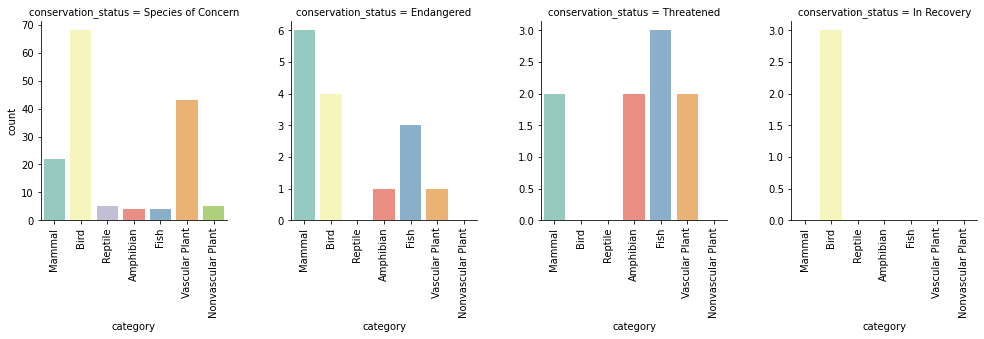

In [4]:
g = sns.catplot(x="category", col="conservation_status", col_wrap=4, data = species, kind="count", height=3.5, aspect=1.0, sharey = None, palette = 'Set3')
g.set_xticklabels(rotation=90)
plt.show()

With our data, we can conclude that mammals have the greatest amount of species endangered, followed by birds and fish.

However, fishes have the most threatened species followed closely by mammals, amphibians and vascular plants.

Birds have nearly 70 species of concern and 3 in recovery.

### Are some categories of animals morel likely to be observed in parks than others?

In the following plot..

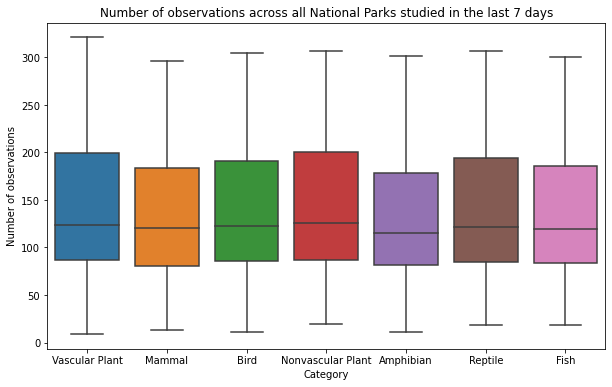

In [21]:
observations_with_cat = pd.merge(observations,species,on='scientific_name',how='left')

plt.figure(figsize=(10,6))
sns.boxplot(data = observations_with_cat, x = 'category', y = 'observations')
plt.xlabel('Category')
plt.ylabel('Number of observations')
plt.title('Number of observations across all National Parks studied in the last 7 days')
plt.show()

To check if there is a statistically significant difference between the categories w